# Getting used to SolverBenchmark

In [13]:
using DataFrames, Printf, Random

Random.seed!(0)

# Pour utiliser SolverBenchmark, il faut une dictionnaire (Symbol des noms de solveurs => DataFrame des résultats du solveur sur les problèmes)
n = 10
names = [:alpha, :beta, :gamma]
stats = Dict(name => DataFrame(
        :id => 1:n,
         :name => [@sprintf("prob%03d", i) for i = 1:n],
         :status => map(x -> x < 0.75 ? :first_order : :failure, rand(n)),
         :f => randn(n),
         :t => 1e-3 .+ rand(n) * 1000,
         :iter => rand(10:10:100, n),
         :irrelevant => randn(n)) 
    for name in names)

Dict{Symbol, DataFrame} with 3 entries:
  :alpha => 10×7 DataFrame…
  :beta  => 10×7 DataFrame…
  :gamma => 10×7 DataFrame…

In [12]:
using SolverBenchmark

pretty_stats(stats[:alpha])

┌────────┬─────────┬─────────────┬───────────┬───────────┬────────┬────────────┐
│     id │    name │      status │         f │         t │   iter │ irrelevant │
├────────┼─────────┼─────────────┼───────────┼───────────┼────────┼────────────┤
│      1 │ prob001 │ first_order │ -2.42e-02 │  6.78e+02 │     60 │  -1.16e+00 │
│      2 │ prob002 │ first_order │ -3.84e-01 │  6.46e+02 │     90 │  -1.35e+00 │
│      3 │ prob003 │     failure │  5.79e-01 │  6.34e+02 │     50 │  -1.17e-01 │
│      4 │ prob004 │     failure │  1.47e+00 │  5.60e+02 │     70 │   1.15e+00 │
│      5 │ prob005 │ first_order │ -1.77e+00 │  5.68e+02 │     10 │  -3.81e-02 │
│      6 │ prob006 │ first_order │  6.09e-01 │  3.44e+02 │     20 │  -1.00e+00 │
│      7 │ prob007 │ first_order │ -1.40e-01 │  4.26e+02 │     10 │  -7.97e-01 │
│      8 │ prob008 │     failure │  8.36e-01 │  6.22e+02 │     20 │   7.45e-01 │
│      9 │ prob009 │ first_order │ -9.29e-01 │  1.48e+02 │     40 │   7.96e-01 │
│     10 │ prob010 │ first_o

In [14]:
pretty_latex_stats(stats[:alpha])

\begin{longtable}{rrrrrrr}
  \hline
  id & name & status & f & t & iter & irrelevant \\\hline
  \endfirsthead
  \hline
  id & name & status & f & t & iter & irrelevant \\\hline
  \endhead
  \hline
  \multicolumn{7}{r}{{\bfseries Continued on next page}}\\
  \hline
  \endfoot
  \endlastfoot
  \(     1\) & prob001 & first\_order & \(-2.42\)e\(-02\) & \( 6.78\)e\(+02\) & \(    60\) & \(-1.16\)e\(+00\) \\
  \(     2\) & prob002 & first\_order & \(-3.84\)e\(-01\) & \( 6.46\)e\(+02\) & \(    90\) & \(-1.35\)e\(+00\) \\
  \(     3\) & prob003 & failure & \( 5.79\)e\(-01\) & \( 6.34\)e\(+02\) & \(    50\) & \(-1.17\)e\(-01\) \\
  \(     4\) & prob004 & failure & \( 1.47\)e\(+00\) & \( 5.60\)e\(+02\) & \(    70\) & \( 1.15\)e\(+00\) \\
  \(     5\) & prob005 & first\_order & \(-1.77\)e\(+00\) & \( 5.68\)e\(+02\) & \(    10\) & \(-3.81\)e\(-02\) \\
  \(     6\) & prob006 & first\_order & \( 6.09\)e\(-01\) & \( 3.44\)e\(+02\) & \(    20\) & \(-1.00\)e\(+00\) \\
  \(     7\) & prob007 & first\_ord

In [15]:
df = stats[:alpha]
pretty_stats(df[!, [:name, :f, :t]])

┌─────────┬───────────┬───────────┐
│    name │         f │         t │
├─────────┼───────────┼───────────┤
│ prob001 │ -2.42e-02 │  6.78e+02 │
│ prob002 │ -3.84e-01 │  6.46e+02 │
│ prob003 │  5.79e-01 │  6.34e+02 │
│ prob004 │  1.47e+00 │  5.60e+02 │
│ prob005 │ -1.77e+00 │  5.68e+02 │
│ prob006 │  6.09e-01 │  3.44e+02 │
│ prob007 │ -1.40e-01 │  4.26e+02 │
│ prob008 │  8.36e-01 │  6.22e+02 │
│ prob009 │ -9.29e-01 │  1.48e+02 │
│ prob010 │  7.89e-02 │  2.31e+02 │
└─────────┴───────────┴───────────┘


In [16]:
pretty_stats(df[!, [:name, :f, :t]], tf=tf_markdown)

|    name |         f |         t |
|---------|-----------|-----------|
| prob001 | -2.42e-02 |  6.78e+02 |
| prob002 | -3.84e-01 |  6.46e+02 |
| prob003 |  5.79e-01 |  6.34e+02 |
| prob004 |  1.47e+00 |  5.60e+02 |
| prob005 | -1.77e+00 |  5.68e+02 |
| prob006 |  6.09e-01 |  3.44e+02 |
| prob007 | -1.40e-01 |  4.26e+02 |
| prob008 |  8.36e-01 |  6.22e+02 |
| prob009 | -9.29e-01 |  1.48e+02 |
| prob010 |  7.89e-02 |  2.31e+02 |


In [17]:
fmt_override = Dict(:f => "%+10.3e",
                    :t => "%08.2f")
hdr_override = Dict(:name => "Name", :f => "f(x)", :t => "Time")
pretty_stats(stdout,
             df[!, [:name, :f, :t]],
             col_formatters = fmt_override,
             hdr_override = hdr_override)

┌─────────┬────────────┬──────────┐
│    Name │       f(x) │     Time │
├─────────┼────────────┼──────────┤
│ prob001 │ -2.425e-02 │ 00677.62 │
│ prob002 │ -3.842e-01 │ 00645.64 │
│ prob003 │ +5.787e-01 │ 00634.04 │
│ prob004 │ +1.468e+00 │ 00559.59 │
│ prob005 │ -1.766e+00 │ 00567.56 │
│ prob006 │ +6.088e-01 │ 00343.52 │
│ prob007 │ -1.402e-01 │ 00426.14 │
│ prob008 │ +8.357e-01 │ 00622.00 │
│ prob009 │ -9.292e-01 │ 00148.25 │
│ prob010 │ +7.889e-02 │ 00230.96 │
└─────────┴────────────┴──────────┘


In [18]:
df = join(stats, [:f, :t])
pretty_stats(stdout, df)

┌────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│     id │   f_alpha │   t_alpha │    f_beta │    t_beta │   f_gamma │   t_gamma │
├────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│      1 │ -2.42e-02 │  6.78e+02 │  5.90e-01 │  3.10e+01 │ -7.31e-01 │  5.23e+02 │
│      2 │ -3.84e-01 │  6.46e+02 │ -9.15e-01 │  1.94e+02 │ -1.38e+00 │  4.25e+02 │
│      3 │  5.79e-01 │  6.34e+02 │ -2.14e+00 │  5.16e+02 │  1.90e+00 │  2.48e+02 │
│      4 │  1.47e+00 │  5.60e+02 │  4.86e-01 │  7.12e+02 │  4.77e-01 │  8.39e+02 │
│      5 │ -1.77e+00 │  5.68e+02 │ -3.67e-01 │  1.17e+02 │  3.74e-01 │  3.24e+02 │
│      6 │  6.09e-01 │  3.44e+02 │ -1.44e+00 │  4.79e+02 │  1.36e+00 │  1.62e+02 │
│      7 │ -1.40e-01 │  4.26e+02 │  1.23e-01 │  6.62e+02 │  8.25e-04 │  8.83e+02 │
│      8 │  8.36e-01 │  6.22e+02 │  2.63e-01 │  3.84e+02 │ -2.04e+00 │  2.83e+02 │
│      9 │ -9.29e-01 │  1.48e+02 │  1.41e+00 │  1.15e+02 │  8.89e-01 │  4.88e+02 │
│   

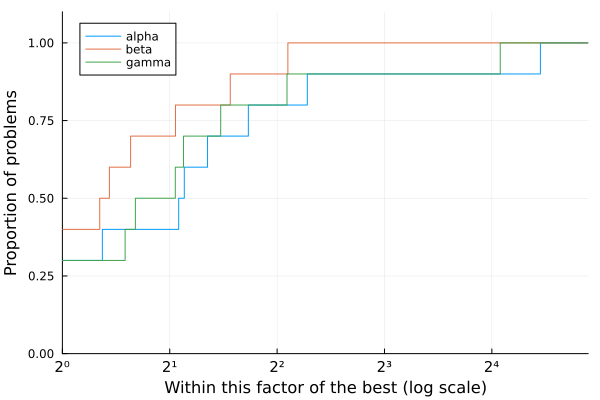

In [19]:
using Plots

p = performance_profile(stats, df -> df.t)

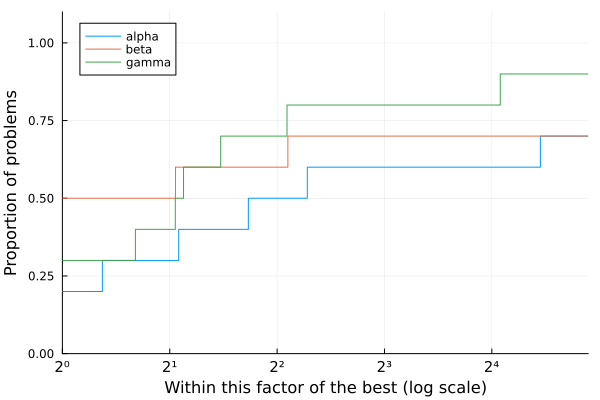

In [20]:
cost(df) = (df.status .!= :first_order) * Inf + df.t
p = performance_profile(stats, cost)

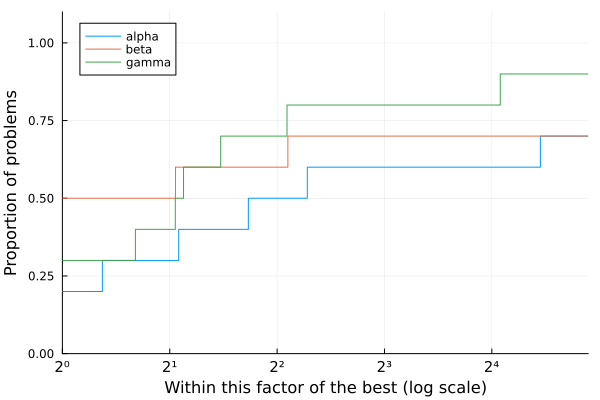

In [21]:
cost(df) = (df.status .!= :first_order) * Inf + df.t
p = performance_profile(stats, cost)